In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
print(len(train_input[0]))

218


In [5]:
print(len(train_input[1]))

189


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths)) # 평균과 중앙값 출력

239.00925 178.0


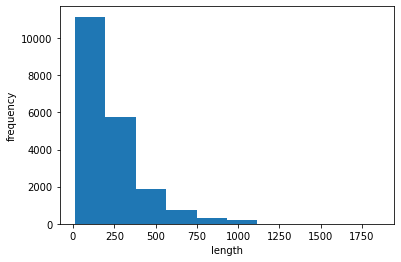

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # 100보다 긴경우는 자르고, 짧은 경우는 0으로 패딩 처리

In [12]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
print(train_input[0][-10:]) # train_seq[0]의 뒷부분과 일치 => 즉, train_seq는 100이 넘을 시 앞부분을 잘랐음
# pad_sequences 함수의 truncationg 매개변수의 기본값은 'pre'. 이를  'post'로 바꾸면 뒷부분을 자르게 된다.

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5]) # 시퀀스의 마지막 부분에 해당할수록 영향력이 커지는 경향이 있으므로, 일반적으로 패딩을 앞부분에 처리한다.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

**순환 신경망 만들기**

In [16]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [19]:
import keras
train_oh = keras.utils.np_utils.to_categorical(train_seq) # 정수 시퀀스를 원핫 인코딩으로 변환

In [20]:
train_oh[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
print(train_oh.shape)

(20000, 100, 500)


In [23]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [24]:
print(np.sum(train_oh[0][0]))

1.0


In [25]:
val_oh = keras.utils.np_utils.to_categorical(val_seq)

In [26]:
from tensorflow import keras

model = keras.Sequential() # 순차적인 레이어(keras.layers.~~)를 더하는(add) 형태로 구성되는 모델

# 8은 순환층의 뉴런 개수
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 기본적으로 활성화 함수는 tanh을 사용
model.add(keras.layers.Dense(1, activation='sigmoid')) # 이진분류

2022-02-15 13:12:47.799845: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-15 13:12:49.437504: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30974 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 학습률을 0.0001로 지정
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

2022-02-15 13:13:31.734604: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
313/313 [==============================] - 20s 56ms/step - loss: 0.6969 - accuracy: 0.4946 - val_loss: 0.6962 - val_accuracy: 0.4820
Epoch 2/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6933 - accuracy: 0.5078 - val_loss: 0.6938 - val_accuracy: 0.4968
Epoch 3/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6913 - accuracy: 0.5199 - val_loss: 0.6923 - val_accuracy: 0.5102
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6896 - accuracy: 0.5321 - val_loss: 0.6912 - val_accuracy: 0.5176
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6878 - accuracy: 0.5397 - val_loss: 0.6902 - val_accuracy: 0.5262
Epoch 6/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6860 - accuracy: 0.5525 - val_loss: 0.6892 - val_accuracy: 0.5370
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6843 - accuracy: 0.5562 - val_loss: 0.6884 - val_ac

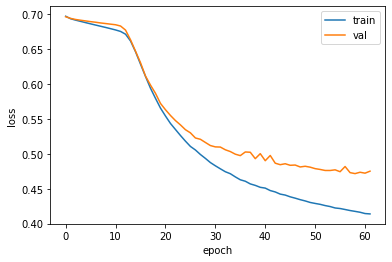

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [30]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100)) # 16은 임베딩 벡터의 크기
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [31]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 51ms/step - loss: 0.6831 - accuracy: 0.5720 - val_loss: 0.6701 - val_accuracy: 0.6278
Epoch 2/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6565 - accuracy: 0.6615 - val_loss: 0.6456 - val_accuracy: 0.6820
Epoch 3/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6293 - accuracy: 0.7075 - val_loss: 0.6205 - val_accuracy: 0.7118
Epoch 4/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6057 - accuracy: 0.7333 - val_loss: 0.6001 - val_accuracy: 0.7336
Epoch 5/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5849 - accuracy: 0.7514 - val_loss: 0.5821 - val_accuracy: 0.7482
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5667 - accuracy: 0.7615 - val_loss: 0.5718 - val_accuracy: 0.7420
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5499 - accuracy: 0.7697 - val_loss: 0.5490 - val_ac

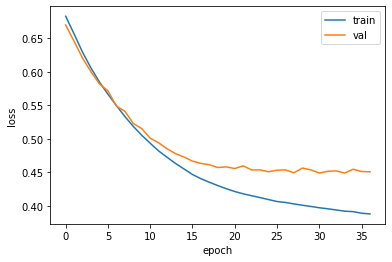

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()